## Name - Bushra Rahman
### Data Science Intern at CodeClause - Dec/2023

### Allocated Golden projects:
#### Project No. 01 - Uber Data Analysis

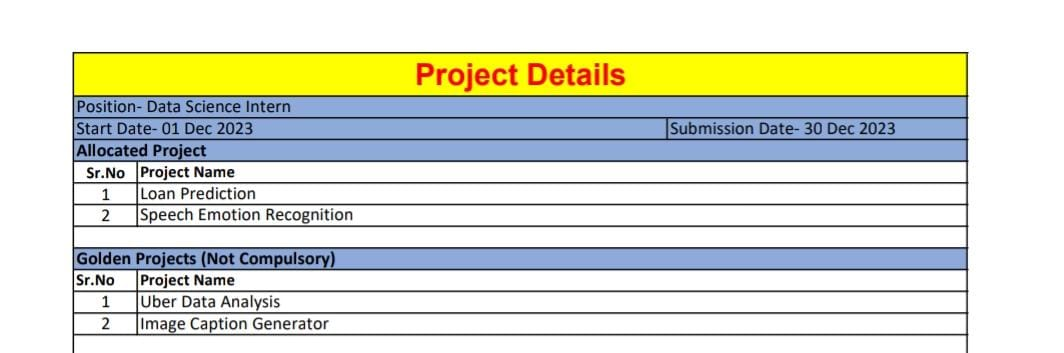

### Importing required libraries :

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

### Loading the dataset :

In [16]:
data = pd.read_csv("Uber.csv")

In [17]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [18]:
data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


#### Data Dimensions :

In [19]:
#Dimension of the dataset
data.shape

(1156, 7)

In [20]:
#Size of the dataset
data.size

8092

#### Checking the null values :

In [21]:
# Check for missing values
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [22]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [23]:
data.isnull().values.sum()

507

In [24]:
#dropping the NA values
data = data.dropna()

In [25]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

#### Data Summary :

In [26]:
#information about all the variables of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [27]:
data.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [6]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [7]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [8]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [11]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [13]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


### Trips that has the starting point of 'San Francisco' :

In [29]:
data[data['START*']== 'San Francisco']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,5/9/2016 14:39,5/9/2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
917,11/7/2016 19:17,11/7/2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11/8/2016 12:16,11/8/2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11/9/2016 18:40,11/9/2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11/10/2016 15:17,11/10/2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


### Most popular starting point for the Uber drivers :

In [35]:
starting_point = data['START*'].dropna()
df = pd.DataFrame(starting_point.value_counts())
df

,count
START*,
Cary,161
Unknown Location,55
Morrisville,54
Whitebridge,36
Durham,30
...,...
Lower Manhattan,1
Lake Reams,1
Latta,1


### Most popular dropping point for the Uber drivers :

In [44]:
stopping_point = data['STOP*'].dropna()
df = pd.DataFrame(stopping_point.value_counts())
df.sort_values(['STOP*'], ascending = False)
df

,count
STOP*,
Cary,155
Morrisville,60
Unknown Location,56
Whitebridge,37
Durham,30
...,...
Cedar Hill,1
Florence,1
Ridgeland,1


In [36]:
#Total number of category group by category 
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

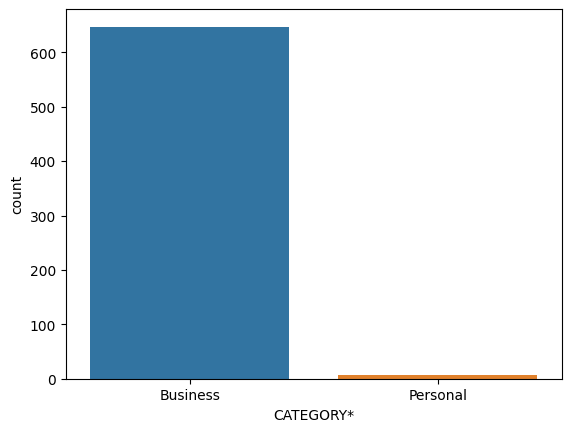

In [16]:
sns.countplot(x='CATEGORY*',data= data)

### How long do people travel with Uber?

<Axes: ylabel='Frequency'>

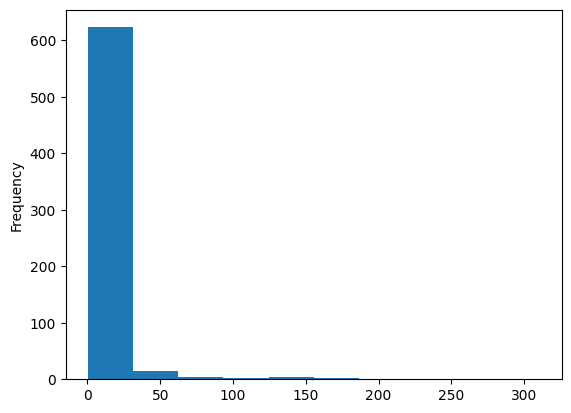

In [17]:
data['MILES*'].plot.hist()

### What Hour Do Most People Take Uber To Their Destination?

Text(0.5, 1.0, 'Number of Trips Vs Hours')

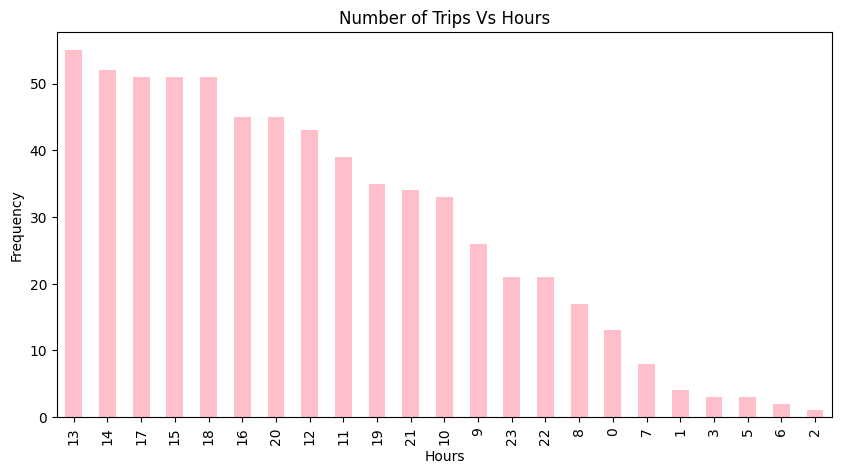

In [21]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar', color = 'pink',figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Hours')

### Check the purpose of trips :

<Axes: xlabel='PURPOSE*'>

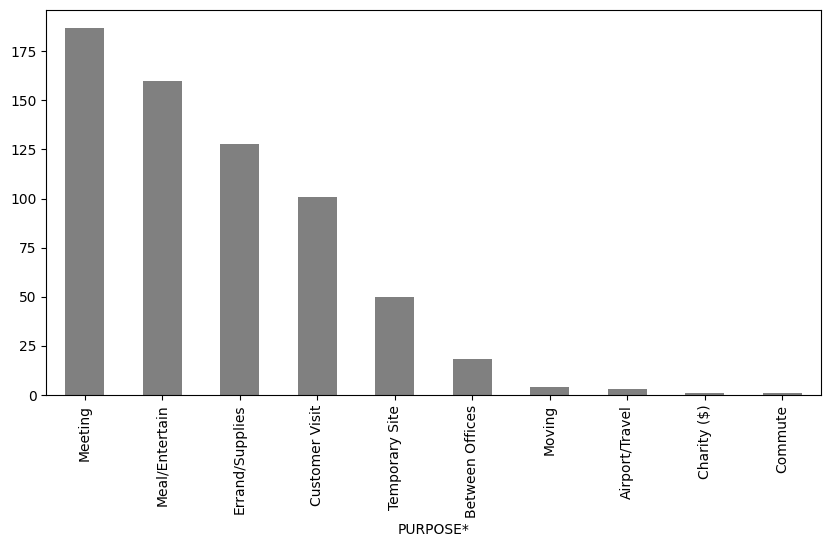

In [24]:
data['PURPOSE*'].value_counts().plot(kind = 'bar', figsize=(10,5), color = 'grey')

### Graph of Purposes vs Distance :

<Axes: xlabel='PURPOSE*'>

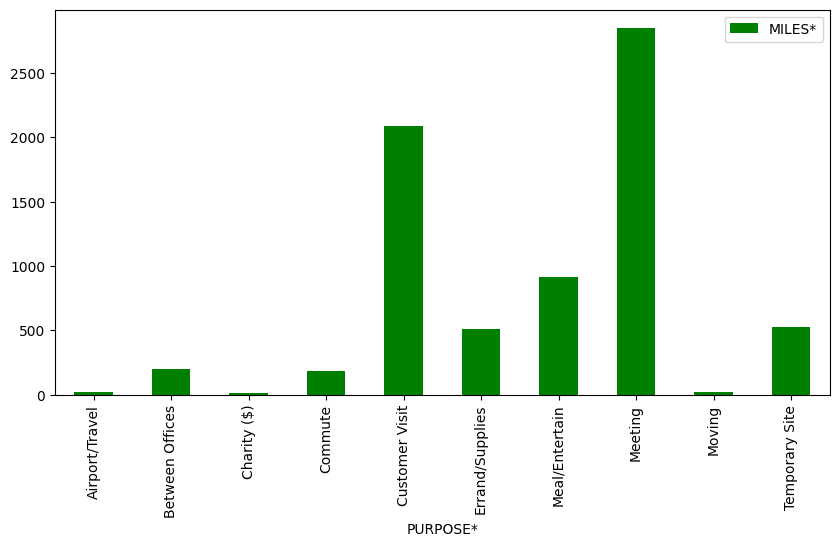

In [55]:
df = pd.DataFrame(data['MILES*'].groupby(data['PURPOSE*']).sum())
df.plot(kind='bar',figsize = (10,5), color = 'green')

### Days has the highest number of Trips :

<Axes: xlabel='WEEKDAY'>

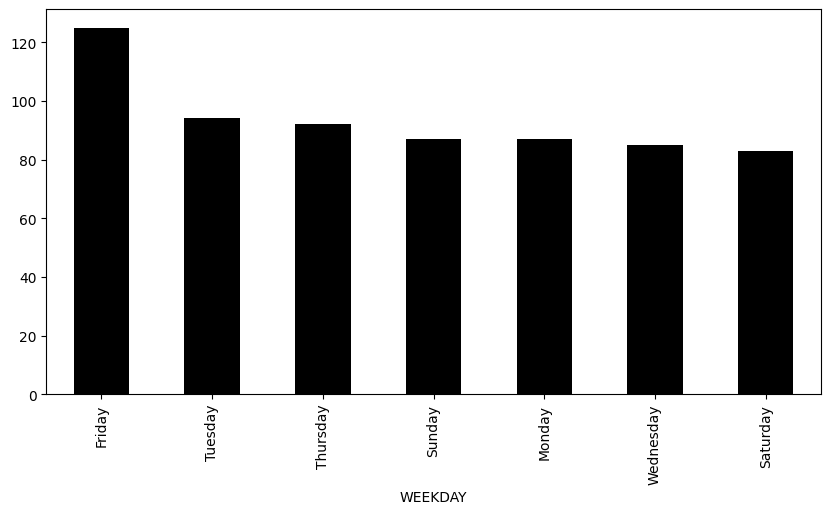

In [43]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color = 'black')

### Number of Trips per day :

<Axes: xlabel='DAY'>

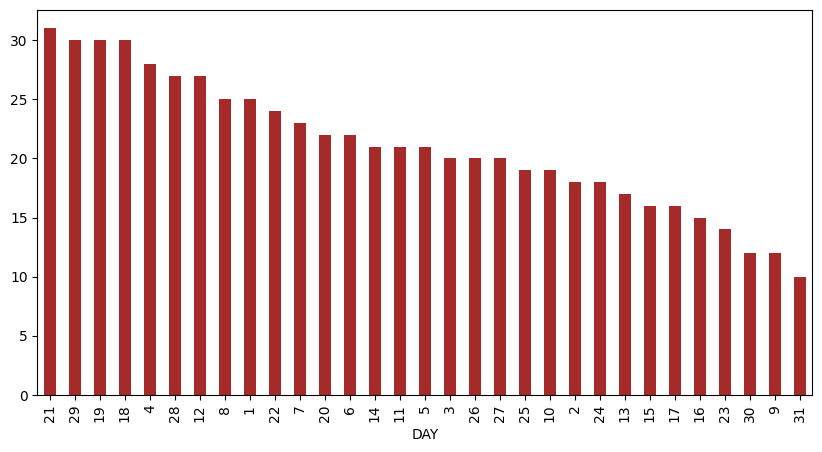

In [33]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color = 'brown')

### Number of Trips in the month :

<Axes: xlabel='MONTH'>

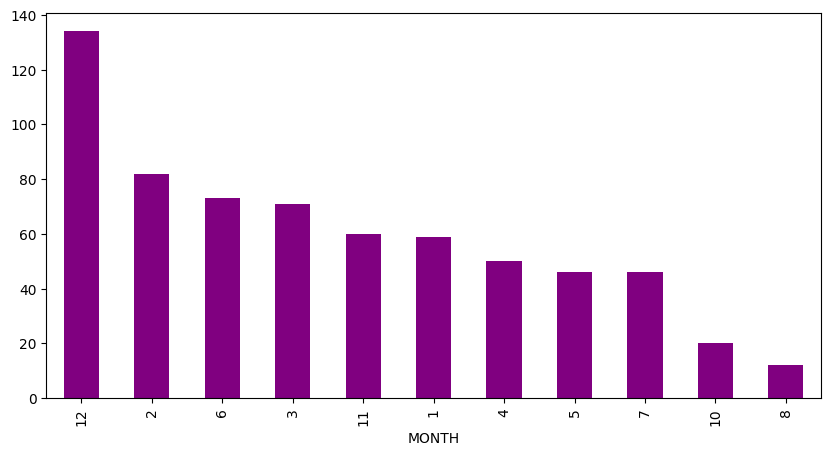

In [44]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color = 'purple')

### Graph of starting point of the trip :

<Axes: xlabel='START*'>

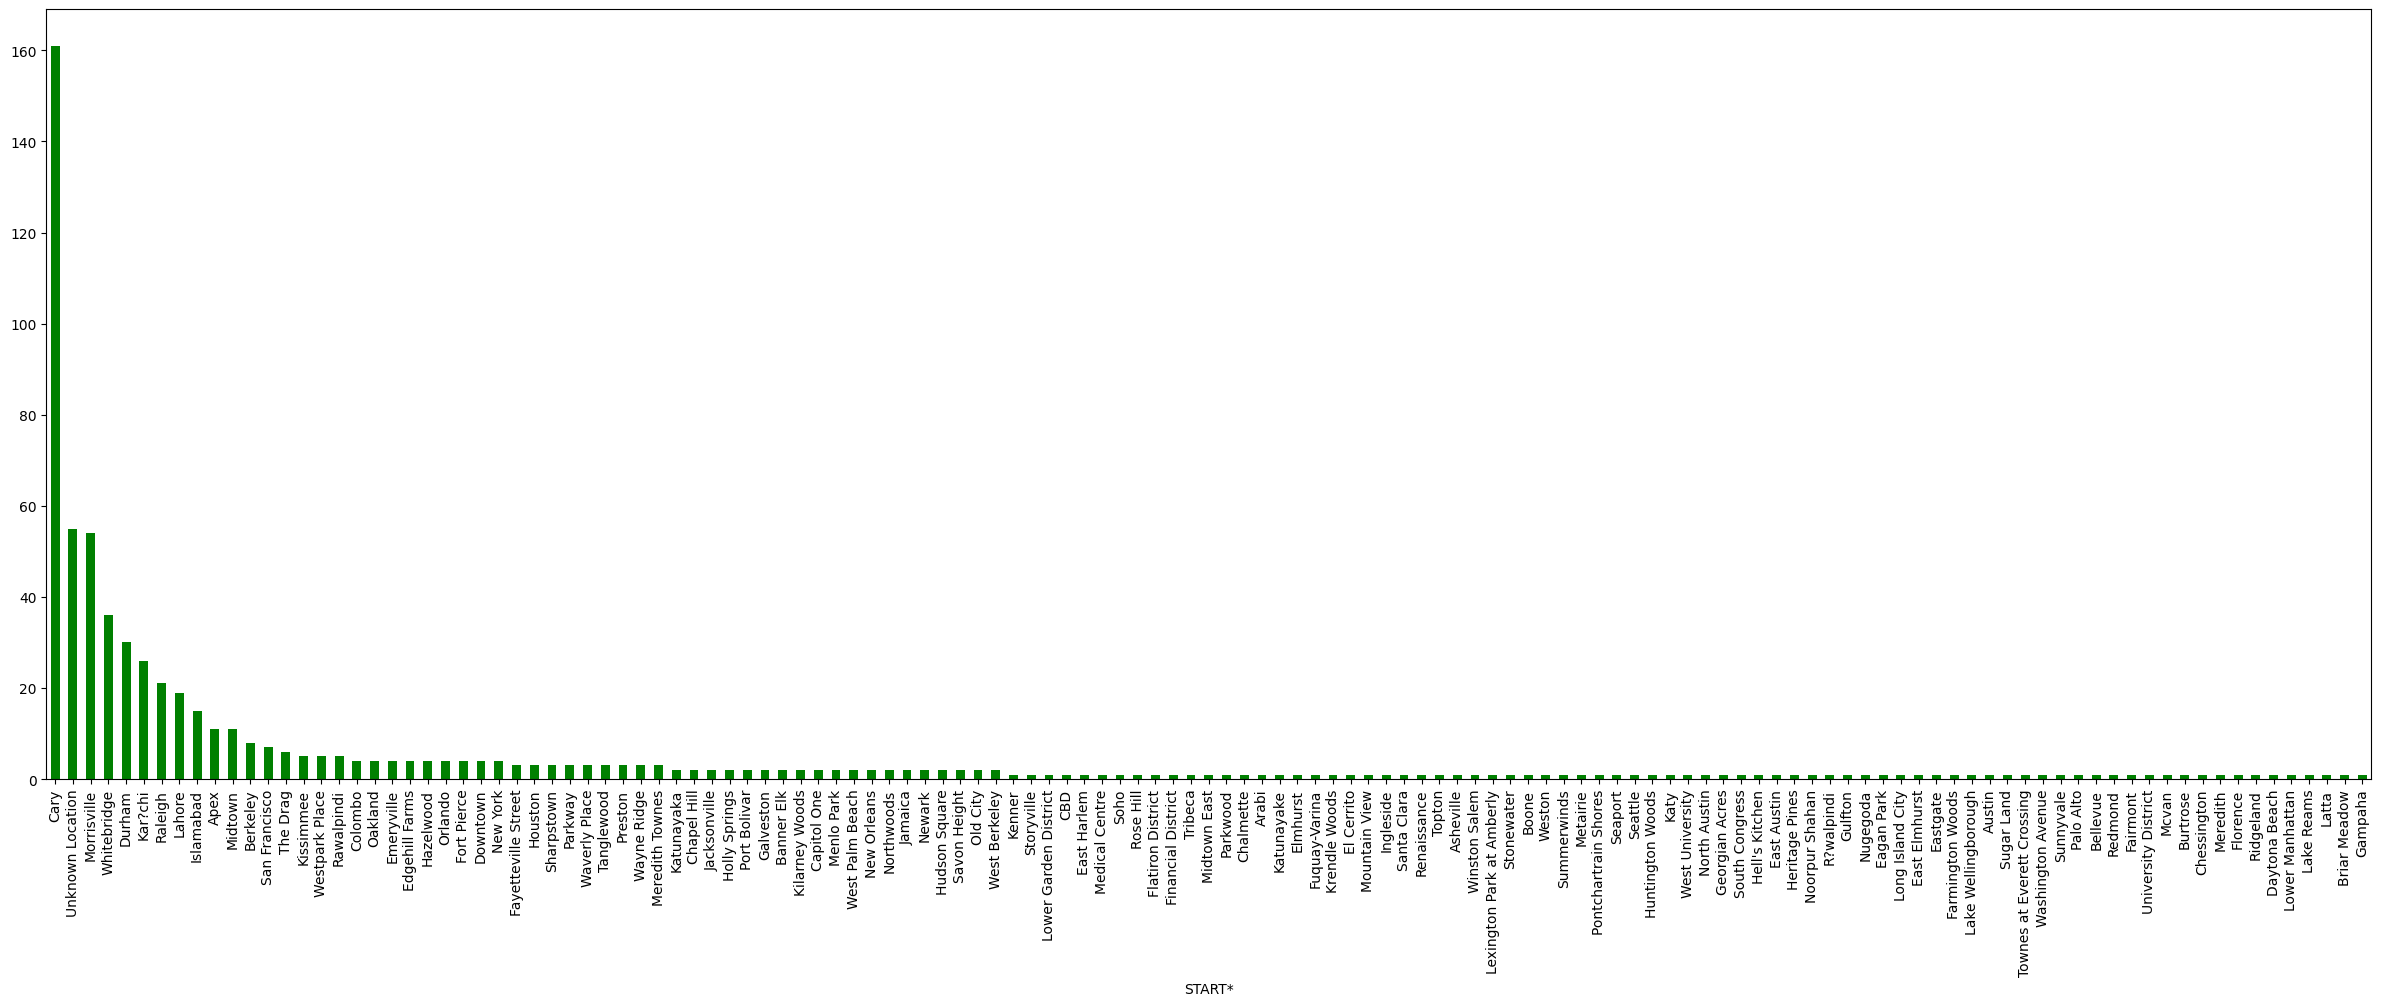

In [42]:
data['START*'].value_counts().plot(kind='bar',figsize=(30,10),color='green')